In [126]:
import numpy as np
import pandas as pd
import wikipedia

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 6)

In [1]:
from data_provider import *

In [131]:
data = pd.read_csv(get_language_dataset(TRAIN_DATA, 'en'))
data = data.fillna(0)

for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], downcast='integer')

In [13]:
data.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,!vote_en.wikipedia.org_desktop_all-agents,3,4,7,4,4,2,3,7,2,...,3,1,6,3,1,1,3,3,1,0
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",0,0,0,0,0,0,0,0,0,...,2898,2676,2032,2294,2074,2175,2156,2302,2098,1770
2,"""European_Society_for_Clinical_Investigation""_...",0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,2
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",2403,20136,1850,1432,1351,1792,1710,2039,1957,...,1401,1238,976,810,989,1332,1243,1681,1303,1098
4,100_metres_en.wikipedia.org_desktop_all-agents,982,881,794,979,1191,1057,1184,860,1259,...,404,344,225,229,335,313,379,393,354,272
5,10_Cloverfield_Lane_en.wikipedia.org_desktop_a...,0,0,0,0,0,0,0,0,0,...,3266,3172,2772,3632,3896,4504,4726,4241,4325,3868
6,10_Gigabit_Ethernet_en.wikipedia.org_desktop_a...,1078,1116,869,327,312,1123,1124,1149,1128,...,1004,613,289,264,439,687,713,701,510,298
7,13_Hours:_The_Secret_Soldiers_of_Benghazi_en.w...,0,45,462,448,424,574,539,569,625,...,1809,1706,1484,1530,1742,2263,2205,2041,1976,2148
8,1551_en.wikipedia.org_desktop_all-agents,11,9,19,26,16,45,33,27,17,...,17,5,19,11,16,10,27,15,26,28
9,1896_Summer_Olympics_en.wikipedia.org_desktop_...,366,392,322,313,340,447,484,375,402,...,290,814,757,190,273,252,255,286,271,225


/home/pavlin/kaggle/webtraffic_forecasting/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/home/pavlin/kaggle/webtraffic_forecasting/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


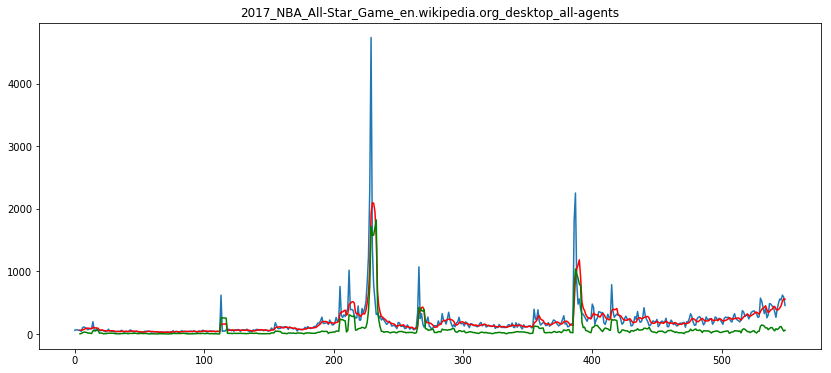

In [127]:
row_index = 72

row = data.iloc[row_index, 1:]

days = list(range(0, len(row.data)))

plt.title(data.iloc[row_index, 0])
plt.plot(days, row)

plt.plot(days, pd.rolling_mean(row, window=5), color='r')
plt.plot(days, pd.rolling_std(row, window=5), color='g')

/home/pavlin/kaggle/webtraffic_forecasting/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/home/pavlin/kaggle/webtraffic_forecasting/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


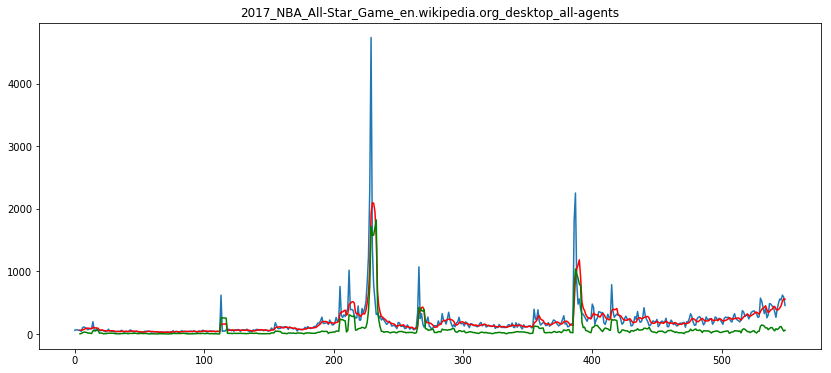

In [141]:
row_index = 72

row = data.iloc[row_index, 1:]

days = list(range(0, len(row.data)))

plt.title(data.iloc[row_index, 0])
plt.plot(days, row)

plt.plot(days, pd.rolling_mean(row, window=5), color='r')
plt.plot(days, pd.rolling_std(row, window=5), color='g')

In [144]:
from fbprophet import Prophetphet

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


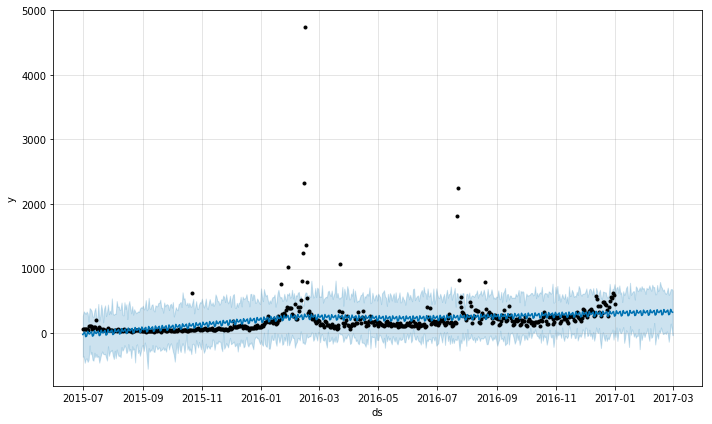

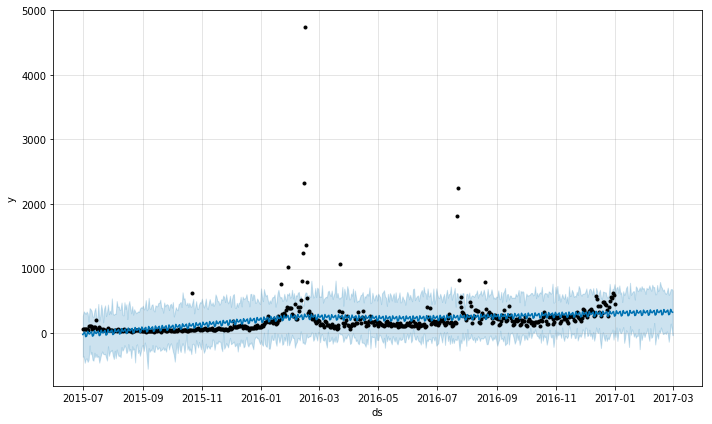

In [179]:
row_ = row

ts = pd.DataFrame({'ds': row_.index, 'y': row_.values})

model = Prophet(uncertainty_samples=50)
model.fit(ts)

future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)
model.plot(forecast)